<a href="https://colab.research.google.com/github/saks0106/ML_Frequent-Lookouts/blob/main/1.6.4.1.Univariate_Imputation_End_of_Dist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

End of Disttibution - Extention of Arbitary. If column if **Normally Distributed** we take mean+3*std or mean-3*std. Goal is we the extreme end values for imputation. If data is **skewwed**, we use IQR proximity rule ie Q1-1.5*IQR and Q3-1.5*IQR where IQR is Q3-Q1. Used when data is **NOT** missing at random


In [ ]:
df=pd.read_csv('titanic.csv', usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


<Axes: >

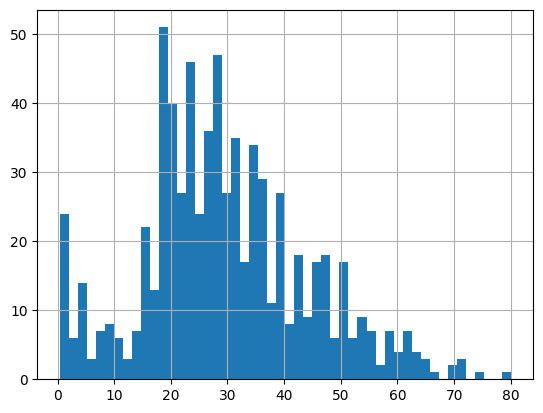

In [ ]:
df.Age.hist(bins=50)

In [ ]:
df['Age'].mean()

29.69911764705882

In [ ]:
extreme=df.Age.mean()+3*df.Age.std() # far end distribution ie more than 3 STD
extreme

73.27860964406094

<Axes: >

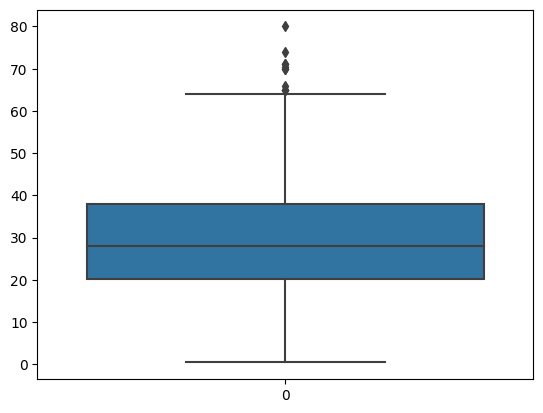

In [ ]:
import seaborn as sns
sns.boxplot(df['Age'])

In [ ]:
def impute_nan(df,variable,median,extreme):
    df[variable+"_end_distribution"]=df[variable].fillna(extreme)
    df[variable].fillna(median,inplace=True)

In [ ]:
impute_nan(df,'Age',df.Age.median(),extreme)

In [ ]:
df.head()

,Survived,Age,Fare,Age_end_distribution
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


<Axes: >

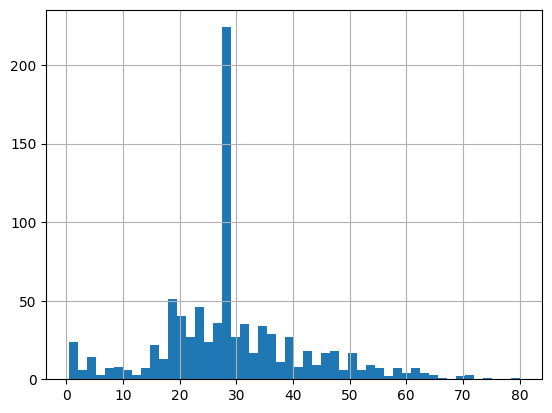

In [ ]:
df['Age'].hist(bins=50)

<Axes: >

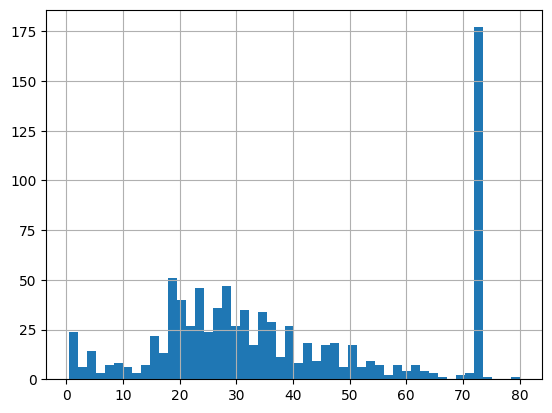

In [ ]:
df['Age_end_distribution'].hist(bins=50)

<Axes: >

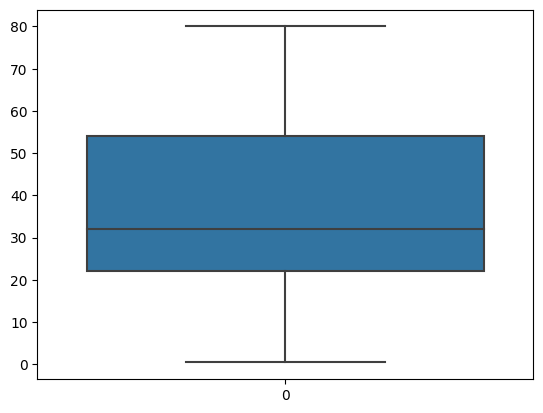

In [ ]:
sns.boxplot(df['Age_end_distribution'])

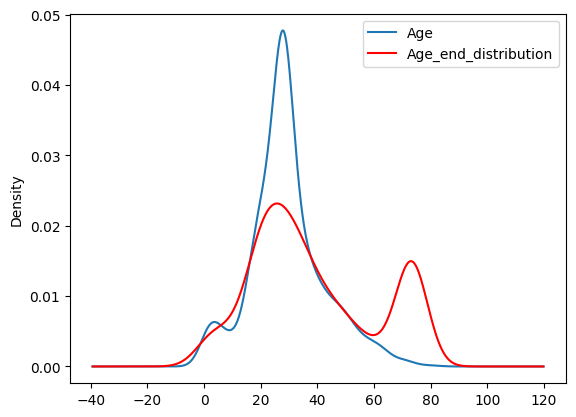

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax)
df['Age_end_distribution'].plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

#Advantages:
1. Easy to implement
2. Captures the importance of missingness if there is one

#DisAdvantages
1. Distorts the original distribution of varaible
2. If missingnesss is not important, it may mask the predictive power of orignal variable by distorting its distribution
3. If no of Na is big, it will mask true outliers  in the distribution
4. If no of Na is small, the replaced Na may be considered as outlier and pre-processing in the subsequent FE
  